In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
class BanditEPS:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x
        
def run_experiment_eps(m1, m2, m3, eps, N):
    bandits = [BanditEPS(m1), BanditEPS(m2), BanditEPS(m3)]

    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
        print(b.N)

    return cumulative_average

class BanditOIV:
    def __init__(self, m, upper_limit):
        self.m = m
        self.mean = upper_limit
        self.N = 0
    
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1-1.0/self.N)*self.mean + (1.0/self.N)*x
        
def run_experiment_oiv(m1, m2, m3, N, upper_limit=10):
    bandits = [BanditOIV(m1, upper_limit), BanditOIV(m2, upper_limit), BanditOIV(m3, upper_limit)]

    data = np.empty(N)

    for i in range(N):
        # optimistic initial values with greedy strategy
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
        print(b.N)

    return cumulative_average

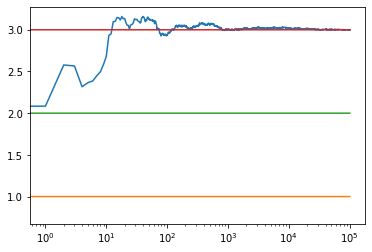

0.7893632579920832
1
2.349792293822066
2
3.000264931356762
99997


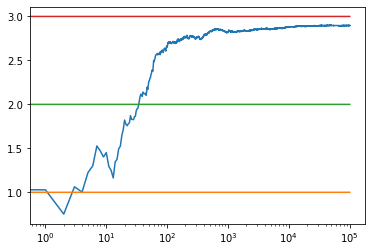

0.9968217112949355
3400
2.0194888210645563
3367
2.998152755707159
93233


In [59]:
oiv = run_experiment_oiv(1.0, 2.0, 3.0, 100000)
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)

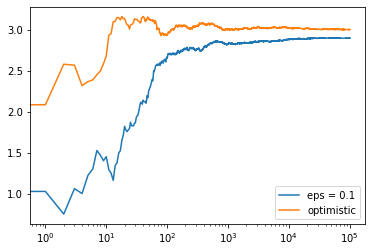

In [60]:
# log scale plot 
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.xscale('log')
plt.show()

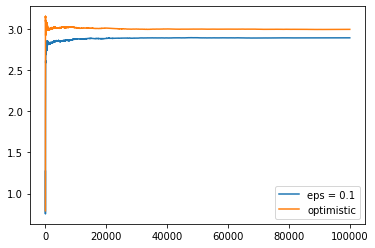

In [61]:
 # linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.show()

Here we can see that with optimistic initial value and greedy strategy cumulative average shift towards 0 faster than the epsilon greedy strategy.
Also the upper limit is set such that it is much higher than the actual mean value (which is 0 here) and hence will try to reduce it as soon as possible.